# Clustering users first

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/ratings_pivot.csv')
df = df.set_index('Cust_Id')
df

,30,58,77,143,252,257,258,331,341,362,...,17343,17383,17424,17479,17515,17563,17611,17621,17697,17725
Cust_Id,,,,,,,,,,,,,,,,,,,,,
0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,3.0,0.0,5.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,4.0,3.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3.0,0.0,0.0,4.0,4.0,4.0,0.0,5.0,0.0,4.0,...,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65529,4.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,3.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
65530,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0
65532,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0


### Some pre-processing

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

In [4]:
#normalize for PCA
transformer = Normalizer()
df = pd.DataFrame(transformer.transform(df))
#implement PCA
pca = PCA(n_components = 0.95)
pca_mdl = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_mdl)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,0.081732,0.054507,0.120532,0.142978,-0.127638,-0.114202,0.068261,-0.058547,0.076139,-0.040179,...,-0.009181,-0.014818,-0.041033,-0.017962,0.014762,0.015662,-0.020718,0.001174,-0.005490,-0.003677
1,-0.107388,0.237996,-0.011349,0.050746,-0.049591,0.000561,0.008869,0.009929,-0.022143,-0.058628,...,0.004366,0.029399,0.016694,-0.040745,0.000510,-0.009959,0.005365,0.016038,0.003007,-0.040248
2,0.011819,-0.070142,0.076537,-0.024479,0.019001,-0.121860,-0.102697,-0.021873,-0.020891,-0.008682,...,-0.008285,-0.005694,-0.020961,0.001998,-0.002481,0.006018,0.002551,-0.007348,-0.002437,0.006883
3,0.235163,-0.200799,-0.024592,0.086299,0.103184,-0.005776,0.003779,-0.033527,0.084677,0.066445,...,-0.014108,-0.002076,0.017460,0.002909,0.001044,0.010764,0.013037,-0.022264,0.005043,-0.002152
4,-0.042129,-0.102921,-0.052393,0.021774,0.003752,-0.062982,0.040915,0.058770,0.026408,0.006069,...,-0.032385,0.019899,-0.020589,-0.015735,-0.004939,0.005954,0.015728,0.016155,-0.001154,0.002504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59041,-0.119865,0.082347,-0.069870,0.017999,-0.086533,0.013074,-0.016385,-0.002610,-0.019484,-0.015256,...,0.011583,0.000708,-0.022328,-0.014436,-0.013426,0.028686,-0.019219,-0.005387,-0.005858,0.021528
59042,-0.141025,0.070979,-0.099437,-0.056141,-0.003194,-0.047317,-0.077013,0.075556,-0.011980,0.012923,...,0.029251,-0.021971,0.013322,-0.022965,-0.024335,-0.016579,-0.042020,-0.029516,-0.028907,0.015588
59043,0.015121,-0.112690,-0.055482,-0.102539,-0.015717,0.161559,-0.073194,-0.002749,-0.089120,-0.037636,...,0.013039,0.078785,-0.009609,0.012135,0.029936,0.034384,0.043767,0.008507,-0.004611,0.013695
59044,0.256679,-0.194247,0.146536,-0.126444,-0.008734,0.080161,-0.228297,-0.076404,0.086027,0.166038,...,0.010665,-0.015996,0.005788,0.002294,0.005386,0.023912,-0.051858,0.033174,-0.036778,0.027114


### KMeans Clustering

In [5]:
from sklearn.cluster import KMeans

In [6]:
%%time
#let's see how the number of clusters effects the score 
kmeans_list = [KMeans(n_clusters=n, max_iter=1000, algorithm='auto') for n in range(1,10)]
scores = [kmeans.fit(pca_df).score(pca_df) for kmeans in kmeans_list]

CPU times: user 10min 3s, sys: 12.7 s, total: 10min 16s
Wall time: 1min 24s


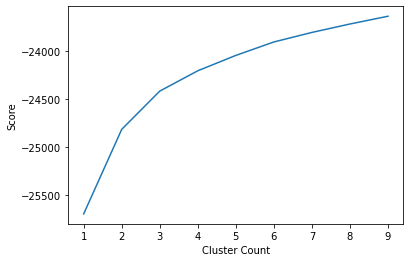

In [7]:
plt.plot(range(1,10), scores)
plt.xlabel('Cluster Count')
plt.ylabel('Score')
plt.show()

### DBSCAN Clusters


In [12]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [8]:
%%time
db = DBSCAN(eps = 0.4, min_samples = 20).fit(pca_df)

CPU times: user 42min 46s, sys: 4.97 s, total: 42min 51s
Wall time: 42min 52s


In [10]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


In [15]:
n_clusters_

0

In [16]:
n_noise_

59046

# FAIL

In [ ]:
db = DBSCAN